<a href="https://colab.research.google.com/github/juanignaciogiacobbe/7506R-2C2023-GRUPO15/blob/main/7506R_TP1_GRUPO15_CHP1_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1: Reservas de Hotel</center>
### <center> Grupo número 15</center>
### <center> Giacobbe, Juan Ignacio; alumno2; alumno3</center>


#Checkpoint 1: Análisis exploratorio y Preprocesamiento de Datos

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Comenzamos importando todas las librerías que vamos a utilizar en el proyecto

In [5]:
#Para análisis de los datos
import pandas as pd
import numpy as np

#Para visualizaciones
import seaborn as sns
from matplotlib import pyplot as plt

Cargamos los archivos csv de datos en dos DataFrames de Pandas

In [6]:
ds_hoteles_test = pd.read_csv('./hotels_test.csv')
ds_hoteles_train = pd.read_csv('./hotels_train.csv')

Vamos a empezar viendo qué forma tiene el dataset, cuántas variables tiene y qué describe cada campo, de esta forma podemos saber de antemano con qué nos enfrentamos.

Vemos información sobre las 2 primeras filas del DataFrame

In [7]:
ds_hoteles_train.head(2)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0.0,1.0,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1.0
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1.0,0.0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0.0


Vemos información de las últimas 2 filas del DataFrame

In [8]:
ds_hoteles_train.tail(2)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
6631,City Hotel,169,2017,April,14,8,2,5,2,2.0,...,No Deposit,9.0,NaN,0,Transient,191.57,0.0,1.0,f29a60f2-db61-4a2e-97c9-89980bb73948,1.0
6632,City Hotel,277,2016,November,46,7,1,2,2,0.0,...,Non Refund,NaN,NaN,0,Transient,NaN,NaN,NaN,NaN,NaN


Vemos cuántas filas y cuántas columnas tiene el DataFrame

In [9]:
ds_hoteles_train.shape

(6633, 31)

Se tienen 61913 filas y 30 columnas. En otras palabras, contamos con datos correspondientes a 61913 reservas, en las cuales tenemos 31 variables sobre las mismas.

Listamos todos los nombres de las columnas del DataFrame

In [10]:
ds_hoteles_train.columns.tolist()

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'id',
 'is_canceled']

A partir de lo anteriormente visto, ahora nos interesa saber qué tipos de datos contienen las columnas del DataFrame

In [11]:
ds_hoteles_train.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

Nos interesa saber también si hay datos faltantes, para ver si en algún futuro podemos hacer una limpieza

In [12]:
print(ds_hoteles_train.isna().sum())

hotel                                0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                             31
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                              830
company                           6310
days_in_waiting_list                 0
customer_type            

Vemos que la variable 'company' es la que tiene más datos faltantes, más adelante volveremos a tener este dato en cuenta.

Siguiendo la idea anterior, ahora veamos cuántos datos no nulos tenemos por columna

In [13]:
print(ds_hoteles_train.count())

hotel                             6633
lead_time                         6633
arrival_date_year                 6633
arrival_date_month                6633
arrival_date_week_number          6633
arrival_date_day_of_month         6633
stays_in_weekend_nights           6633
stays_in_week_nights              6633
adults                            6633
children                          6633
babies                            6633
meal                              6633
country                           6602
market_segment                    6633
distribution_channel              6633
is_repeated_guest                 6633
previous_cancellations            6633
previous_bookings_not_canceled    6633
reserved_room_type                6633
assigned_room_type                6633
booking_changes                   6633
deposit_type                      6633
agent                             5803
company                            323
days_in_waiting_list              6633
customer_type            

Observamos que la gran mayoría de campos no tienen datos faltantes, hay muy pocas columnas que les faltan datos.



---

# Variable hotel
Esta columna representa al tipo de hotel en el cual se realizó la reserva. El tipo de dato de esta columna es de tipo object, por lo que sospechamos que es una variable del tipo cualitativa, entonces procedemos a ver qué posibles valores pueden tomar y qué tan frecuentes son.

Vemos los valores que toma esta variable

In [14]:
columna_hotel = ds_hoteles_train['hotel']
columna_hotel.value_counts()

City Hotel      4545
Resort Hotel    2088
Name: hotel, dtype: int64

Nos apoyamos en un grafico de barras para ver la distribucion

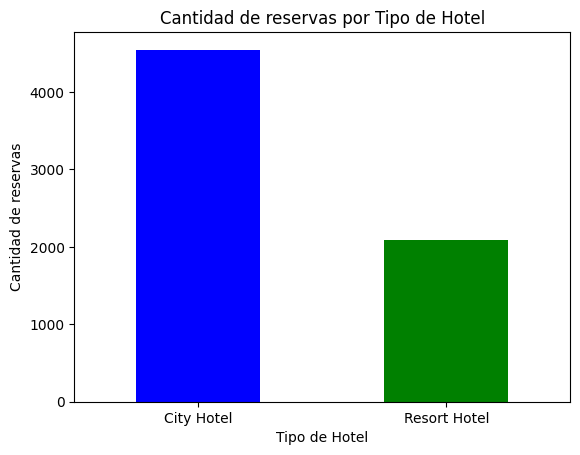

In [15]:
columna_hotel.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Tipo de Hotel')
plt.ylabel('Cantidad de reservas')
plt.title('Cantidad de reservas por Tipo de Hotel')
plt.xticks(rotation=0)
plt.show()

Observamos que la gran mayoria de reservas(exactamente 42129 reservas) se dieron en los llamados 'city hotel', mientras que el resto de reservas(19784) fueron en hoteles del tipo 'resort hotel'

Ahora nos interesa saber cuantas reservas se cancelaron efectivamente dependiendo del tipo de hotel que se eligio

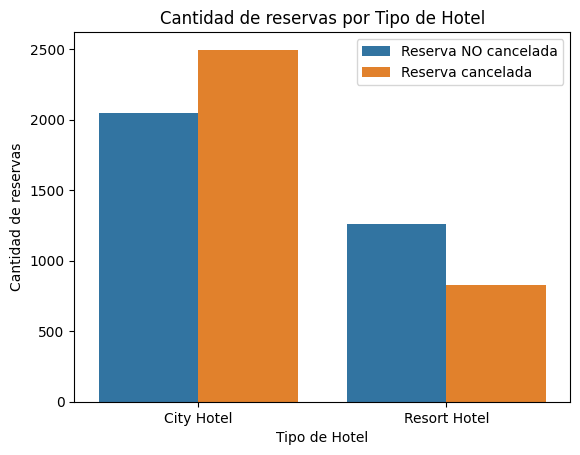

In [16]:
sns.countplot(data=ds_hoteles_train, x="hotel", hue="is_canceled")
plt.xlabel('Tipo de Hotel')
plt.ylabel('Cantidad de reservas')
plt.title('Cantidad de reservas por Tipo de Hotel')
plt.legend(labels=["Reserva NO cancelada","Reserva cancelada"])

Observamos que las reservas con hoteles del tipo 'City Hotel' tienen alrededor de 23000 reservas canceladas(mas reservas canceladas que las que NO se cancelaron). En cambio, las reservas en hoteles del tipo 'Resort Hotel' conservan alrededor de 12000 reservas que NO se cancelaron, mientras que casi 8000 reservas si se cancelaron.

Con esto, tomamos como conclusion de que las reservas que tienen un tipo de hotel 'City Hotel' tienden a ser mas canceladas que las que tienen 'Resort Hotel'. Mas adelante volveremos a comparar ciertas variables con esta.



---

# Variable lead time

Esta variable representa la cantidad de días que entre que se hizo la reserva y la fecha de entrada al hotel. Se calcula a partir de la resta del día la fecha de entrada al hotel.
Es una variable cuantitativa (int), por lo que procedemos a ver la mayor cantidad de metricas posibles (media, mediana, moda, etc)

In [17]:
columna_lead_time = ds_hoteles_train['lead_time']
columna_lead_time.describe()

count    6633.000000
mean      112.080507
std       109.823932
min         0.000000
25%        24.000000
50%        78.000000
75%       170.000000
max       626.000000
Name: lead_time, dtype: float64

Visualizamos los datos en un boxplot para poder observar una mejor distribucion de los datos

<Axes: xlabel='lead_time'>

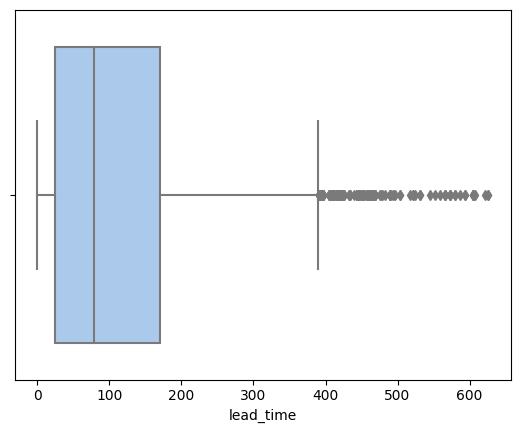

In [18]:
sns.boxplot(x = columna_lead_time, palette = "pastel")

Observamos que una mayoría de reservas tuvieron un lead_time con valor entre 50 y 150. Es decir, la mayoría de reservas se dieron entre 50 días y 150 días de anticipación.

Buscamos una relación entre el tipo de hotel de estas reservas y la variable lead_time.

<Axes: xlabel='lead_time', ylabel='hotel'>

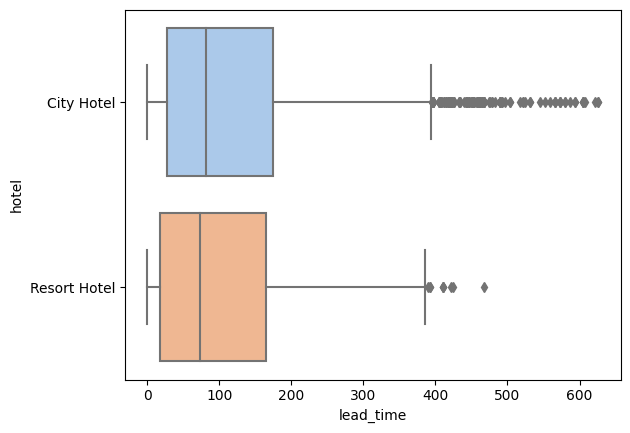

In [19]:
sns.boxplot(x = columna_lead_time, y = ds_hoteles_train["hotel"], palette = "pastel")

A partir de este gráfico y las estadísticas podemos observar que la mayoría de las reservas entre se hacen entre los 0 dias y 200 dias, con varios outliers con reservas de más de 400 dias. Observamos más detalladamente, la distribución de los datos sin los outliers y de solo los outliers

In [20]:
ds_lead_time_menor_400 = ds_hoteles_train.loc[columna_lead_time < 400]
ds_lead_time_menor_400.shape

(6492, 31)

Podemos observar que hemos filtrado solamente alrededor de 1300 columnas. Ahora observemos la distribucion de los datos para estos datos

In [21]:
ds_lead_time_menor_400["lead_time"].describe()

count    6492.000000
mean      104.323783
std        97.043854
min         0.000000
25%        23.000000
50%        75.000000
75%       164.000000
max       396.000000
Name: lead_time, dtype: float64

De nuevo, nos apoyamos en un boxplot para observar estas medidas

<Axes: xlabel='lead_time'>

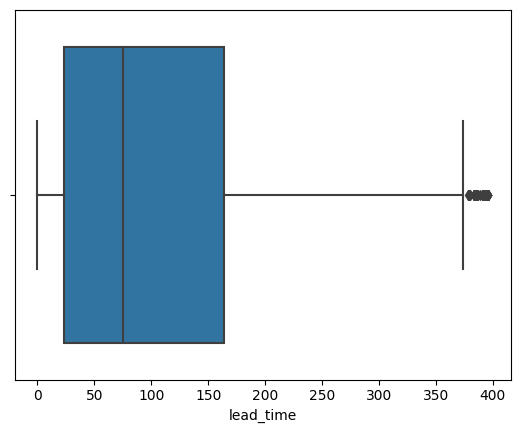

In [22]:
sns.boxplot(x = ds_lead_time_menor_400["lead_time"])

Observamos que estas reservas tuvieron un lead_time con valor entre 30 y 170 aproximadamente.

Agregamos clasificacion por el tipo de hotel

<Axes: xlabel='lead_time', ylabel='hotel'>

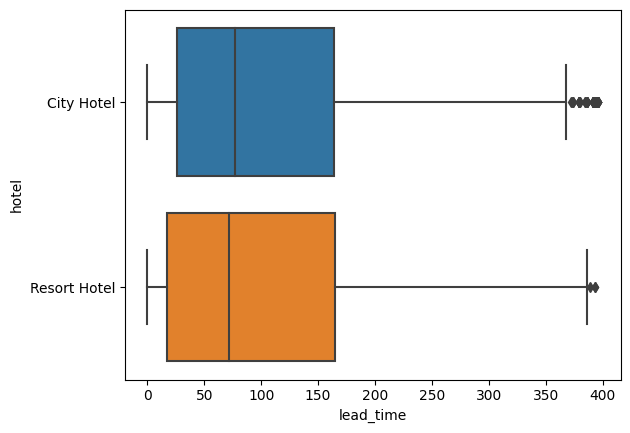

In [23]:
sns.boxplot(x = ds_lead_time_menor_400["lead_time"], y = ds_lead_time_menor_400["hotel"])

In [24]:
# Transform the is canceled
#ds_lead_time_menor_400["isCanceled"] = ds_lead_time_menor_400["is_canceled"].transform(lambda x : "Yes" if x == 1 else "No")
#ds_lead_time_menor_400["isCanceled"].describe

In [25]:
#sns.boxplot(x = ds_lead_time_menor_400["lead_time"], y = ds_lead_time_menor_400["isCanceled"])

Histograma
A definir que dice????

<Axes: xlabel='lead_time', ylabel='Count'>

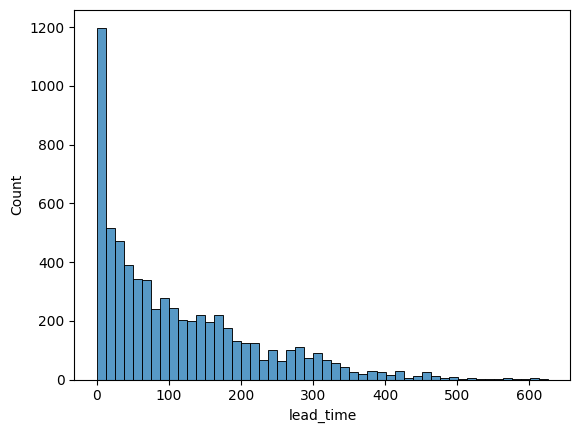

In [26]:
sns.histplot(data = ds_hoteles_train, x = "lead_time", bins = 50)



---

# Variables arrival, day, month and year
asfa

---

# Variables adults, children y babies


Estas variables del tipo cuantitativas las analizamos juntas para ver si podemos encontrar algún patrón para las reservas con muchas personas(quizás conformadas por grupos familiares), viendo también la cantidad de adultos, niños y bebés que tuvieron las mismas.

In [27]:
columna_adults = ds_hoteles_train['adults']
columna_adults.value_counts()

2     5005
1     1251
3      350
0       22
4        3
5        1
40       1
Name: adults, dtype: int64

Podemos observar que la gran mayoría de reservas tienen 2 adultos, mientras que hay muy pocas que tienen más de 10 adultos.

In [28]:
columna_adults.loc[columna_adults > 0].value_counts().sum()

6611

no todos los viajes tienen presencia de adultos!!!

In [29]:
columna_children = ds_hoteles_train['children']
columna_children.value_counts()

0.0    6129
1.0     285
2.0     214
3.0       5
Name: children, dtype: int64

In [30]:
columna_children.loc[columna_children > 0.0].value_counts().sum()

504

Hay 4452 reservas que tuvieron niños en la misma.

In [31]:
columna_babies = ds_hoteles_train['babies']
columna_babies.value_counts()

0    6580
1      53
Name: babies, dtype: int64

In [32]:
columna_babies.loc[columna_babies > 0].value_counts().sum()

53

Hay 428 reservas que tuvieron bebes a bordo.



---

# Variable company

Para la columna company, que es la columna con mayores valores nulos cuales de estos son valores unicos, y cuanta cantidad hay de estos

In [33]:
ds_hoteles_train['company'].value_counts()

223.0    37
40.0     33
67.0     18
45.0     16
281.0    10
         ..
167.0     1
9.0       1
204.0     1
83.0      1
148.0     1
Name: company, Length: 114, dtype: int64


---

# Variable ADR

Esta variable nos dice la tarifa promedio por día de cada reserva. Nos da una idea del precio por día de alojamiento. Es una variable del tipo cuantitativa, por lo que procedemos a analizar sus medidas de resumen(media, mediana, moda, etc).

In [34]:
columna_adr = ds_hoteles_train['adr']
columna_adr.value_counts()

62.00     235
75.00     163
90.00     161
65.00     138
80.00     131
         ... 
53.87       1
140.60      1
56.10       1
111.33      1
100.89      1
Name: adr, Length: 1612, dtype: int64

Como es de esperarse, esta variable contiene muchos valores posibles, asi que vamos a ver si para esta variable hay datos faltantes en un principio

In [35]:
columna_adr.isna().sum()

1

Esta variable no tiene datos faltantes, por lo que no vamos a tener problemas con la misma

Ahora nos interesa saber las medidas de resumen, como la media, mediana, moda, etc..

In [36]:
columna_adr.describe()

count    6632.000000
mean      103.217444
std        48.660780
min         0.000000
25%        70.000000
50%        95.000000
75%       127.462500
max       378.000000
Name: adr, dtype: float64

Visualizamos estas medidas en un boxplot

<Axes: xlabel='adr'>

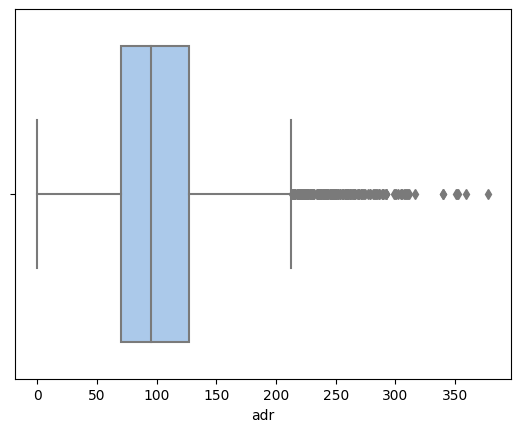

In [37]:
sns.boxplot(x = columna_adr, palette = "pastel")

Observamos que la gran mayoria de reservas tuvieron tarifas diarias que rondaron entre los 80 y 120 (no se que moneda), mientras que hay bastantes que superaban la barrera de los 200.

Nos interesa saber ahora si podemos encontrar algun dato de importancia para esas reservas que superaron los 200

In [38]:
ds_adr_mayor_200 = ds_hoteles_train.loc[columna_adr > 200]
ds_adr_mayor_200.shape

(287, 31)

Hay 2574 reservas que superaron una reserva diaria de 200, ahora vamos a ver la distribucion de esas reservas

In [39]:
ds_adr_mayor_200['adr'].describe()

count    287.000000
mean     240.285714
std       33.304987
min      200.050000
25%      214.735000
50%      231.000000
75%      256.535000
max      378.000000
Name: adr, dtype: float64

<Axes: xlabel='adr'>

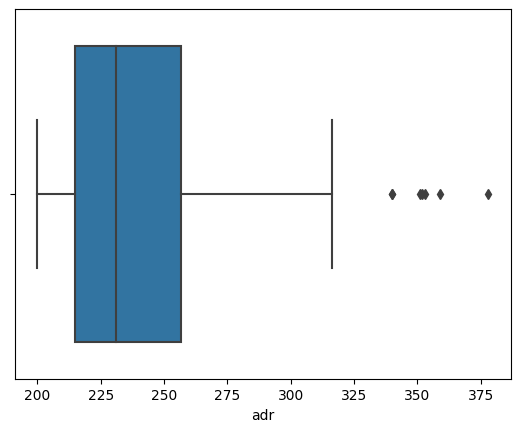

In [40]:
sns.boxplot(x = ds_adr_mayor_200["adr"])

A estas reservas vamos a clasificarlas por el tipo de hotel

<Axes: xlabel='adr', ylabel='hotel'>

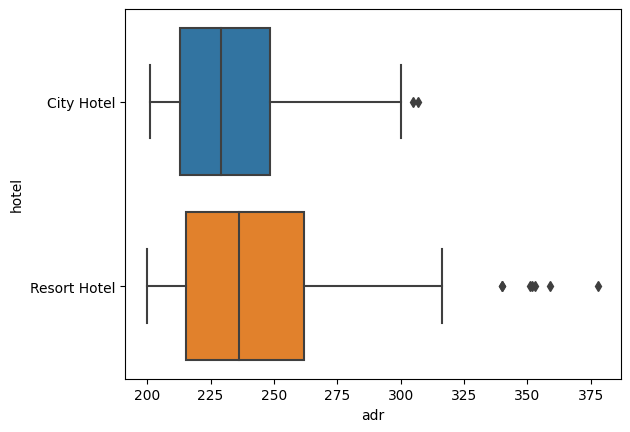

In [41]:
sns.boxplot(x = ds_adr_mayor_200["adr"], y = ds_adr_mayor_200["hotel"])

Tomamos como conclusion que los hoteles del tipo Resort tuvieron reservas con ADR mas elevados en promedio que los del tipo City.

Vamos a partir de una hipotesis que nos puede dar un dato clave: ¿Qué relación hay entre las reservas que tuvieron un ADR mayor a 200 con las reservas canceladas?(suponiendo que al tener un valor elevado esto pudo haber generado más de una cancelación)

In [42]:
ds_adr_mayor_200['is_canceled'].value_counts()

0.0    147
1.0    140
Name: is_canceled, dtype: int64

Acordemosnos que, según la notación usada en el DataFrame, la variable is_canceled puede tomar dos valores: 1 si, finalmente la reserva fue cancelada y 0, si la reserva no fue cancelada.

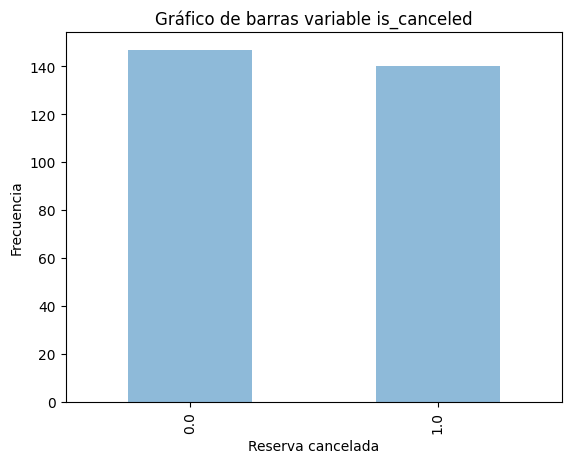

In [43]:
grf_ds= ds_adr_mayor_200['is_canceled'].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable is_canceled" , xlabel="Reserva cancelada" , ylabel="Frecuencia")

Esto que obtuvimos tiene un valor muy grande: conseguimos ver que 1305 viajes con un adr mayor a 200 fueron cancelados.

Comenzamos con la Exploracion Inicial: Vamos a comenzar a analizar cada variable del dataset, considerando ciertos aspectos de interés para nuestro análisis



# Variable is_repeated_guest

Es el valor que indica si el nombre de la reserva
fue de un invitado repetido (1) o no (0).Es una variable cualitativa, por lo cual procedemos a ver qué posibles valores pueden tomar y qué tan frecuentes son

In [44]:
ds_hoteles_train['is_repeated_guest'].value_counts()

0    6461
1     172
Name: is_repeated_guest, dtype: int64

Podemos visualizar que existen mayor cantidad de personas que no habian visitado antes el hotel que de personas que si habian visitado.
Voy a relizar un grafico de torta para poder visualizarlo mas detallado.

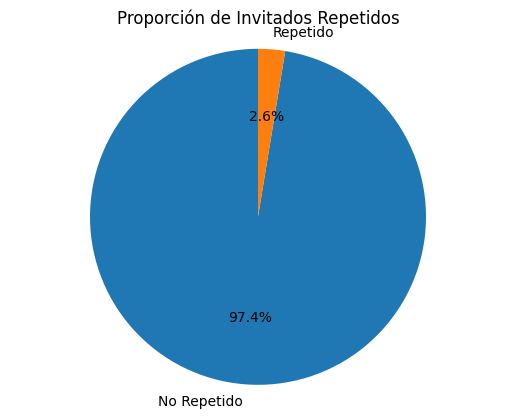

In [45]:
repetido_counts = ds_hoteles_train['is_repeated_guest'].value_counts()
labels = ['No Repetido', 'Repetido']
plt.pie(repetido_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proporción de Invitados Repetidos')
plt.show()

Analizare si existen datos faltantes,para poder seguir con el analisis

In [46]:
ds_hoteles_train['is_repeated_guest'].isna().sum()

0

Procedere a analizar,junto a las otras variables,a buscar correlacion entre ellas;y la primer variable que puede tener una conexion con la misma es la variable hotel.
La usare para calcular la proporción de invitados repetidos en cada tipo de hotel. Esto te ayudará a comprender si la proporción de invitados repetidos varía según el tipo de hotel.

In [47]:
proporcion_por_tipo_de_hotel = ds_hoteles_train.groupby('hotel')['is_repeated_guest'].mean()* 100
print(proporcion_por_tipo_de_hotel)

hotel
City Hotel      2.112211
Resort Hotel    3.639847
Name: is_repeated_guest, dtype: float64


Estos resultados nos muestran que:


*  En el "City Hotel," aproximadamente el 2.31% de los invitados son repetidos
* En el "Resort Hotel," aproximadamente el 3.85% de los invitados son repetidos.  


Estos resultados sugieren que el "Resort Hotel" tiene una proporción más alta de invitados repetidos en comparación con el "City Hotel.
Lo veremos en un grafico

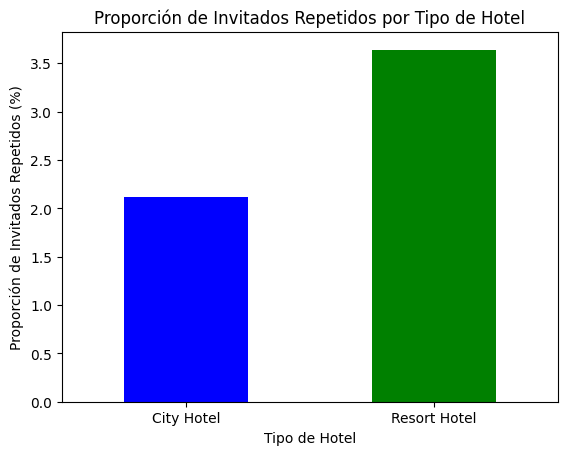

In [48]:


proporcion_por_tipo_de_hotel.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Tipo de Hotel')
plt.ylabel('Proporción de Invitados Repetidos (%)')  # Agregar (%) al título del eje y
plt.title('Proporción de Invitados Repetidos por Tipo de Hotel')
plt.xticks(rotation=0)
plt.show()



Voy a ver como esta relacionada la variable con las cancelaciones

In [49]:
repetidos_df = ds_hoteles_train[ds_hoteles_train['is_repeated_guest'] == 1]
no_repetidos_df = ds_hoteles_train[ds_hoteles_train['is_repeated_guest'] == 0]



En estos nuevos dataframes,tengo separado los clientes repetidos y ls no repetidos ,y a continuacion voy a ver en un grafico si la cancelaciones tienen una conexion con las cancelaciones

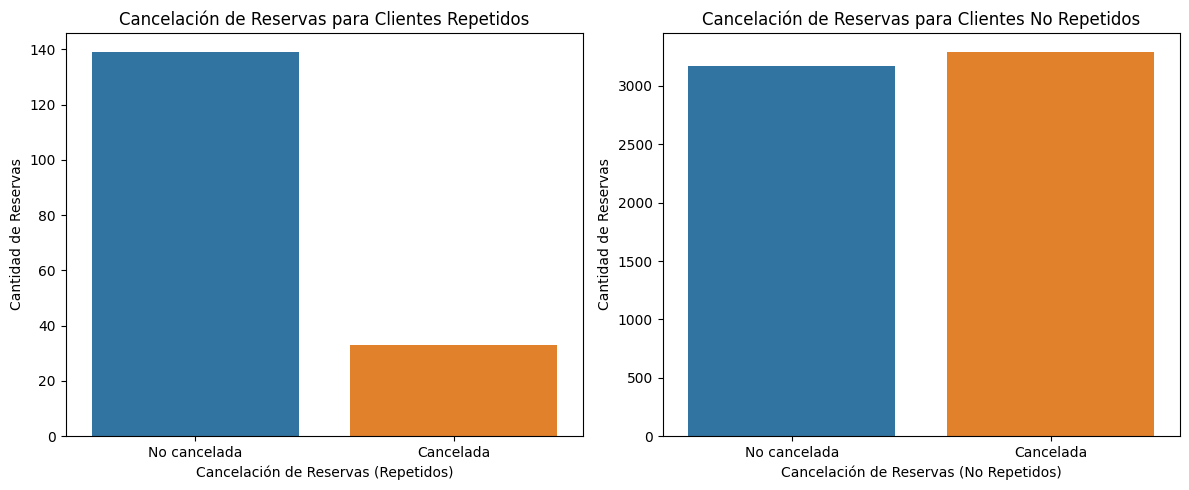

In [50]:
# Crear dos gráficos de barras separados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=repetidos_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas (Repetidos)')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas para Clientes Repetidos')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.subplot(1, 2, 2)
sns.countplot(data=no_repetidos_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas (No Repetidos)')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas para Clientes No Repetidos')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x



plt.tight_layout()
plt.show()

A simple vista con los clientes no repetidos no existe mucha relacion entre las cancelaciones,mientras que los clientes repetidos tienden a no cancelar las reservas por encima de las canceladas

# Variable CustomerType

Esta variable se refiere al tipo de reservas que se realizaron,es una variable cualitativa y vamos a ver como se distribuye en los datos

In [51]:
ds_hoteles_train['customer_type'].value_counts()

Transient          5092
Transient-Party    1293
Contract            220
Group                28
Name: customer_type, dtype: int64

Lo voy a ilustrar en un grafico de torta para poder visualizar mejor su distribucion:

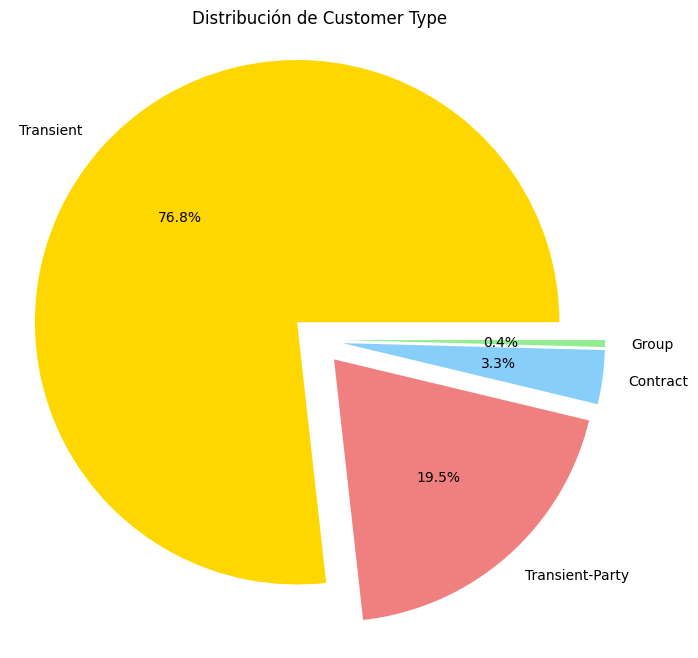

In [52]:


customer_type_counts = ds_hoteles_train['customer_type'].value_counts()

# Configuración para hacer que el gráfico de torta sea más legible
explode = (0.1, 0.1, 0.1, 0.1)  # Separación de las porciones
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']  # Colores

# Crea el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(customer_type_counts, labels=customer_type_counts.index, explode=explode, colors=colors,
        autopct='%1.1f%%')
plt.title('Distribución de Customer Type')
plt.axis('equal')  # Hace que el gráfico de torta sea circular

plt.show()






Ahora voy a ver como se relacionan estos tipos de contrato con las cancelaciones,a continuacion analizo el tipo Transient ver si se debe al tipo de reservas son

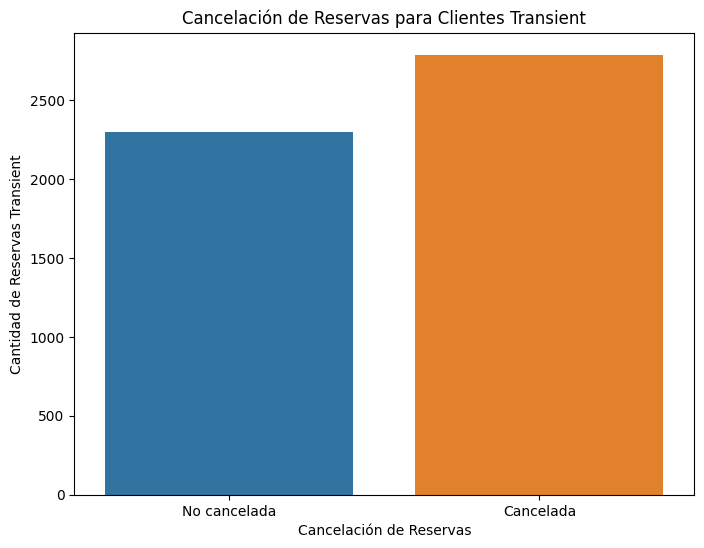

In [53]:
transient_df = ds_hoteles_train[ds_hoteles_train['customer_type'] == 'Transient']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=transient_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas Transient')
plt.title('Cancelación de Reservas para Clientes Transient')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Apaentemente los clientes Transient que cancelaron son mayores que los que no cancelaron,ahora vere con el tipo Transient-party


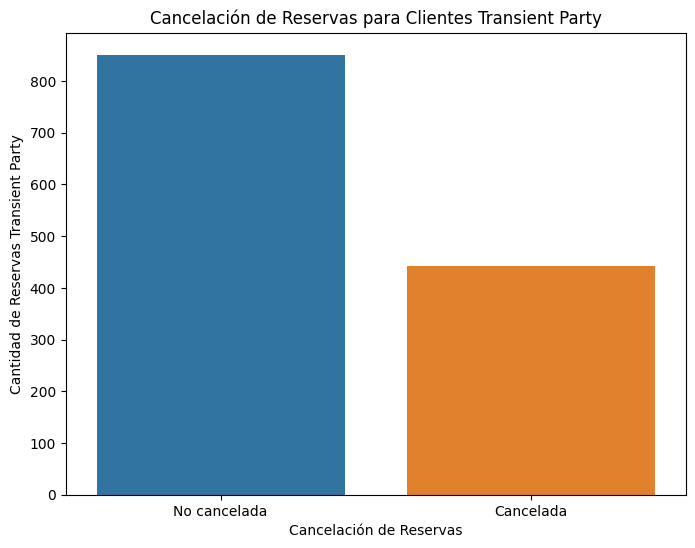

In [54]:
transient_party_df = ds_hoteles_train[ds_hoteles_train['customer_type'] == 'Transient-Party']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=transient_party_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas Transient Party')
plt.title('Cancelación de Reservas para Clientes Transient Party')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Apaentemente los clientes Transient Party que cancelaron son menores que los que no cancelaron,ahora vere con el tipo Contract


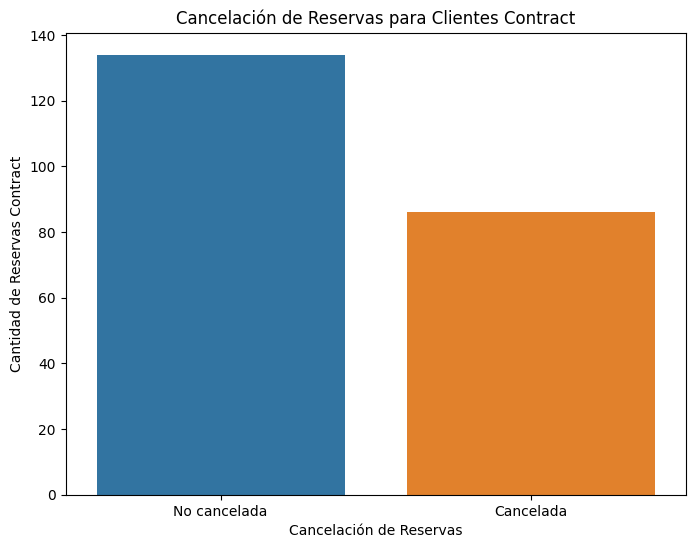

In [55]:
contract_df = ds_hoteles_train[ds_hoteles_train['customer_type'] == 'Contract']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=contract_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas Contract')
plt.title('Cancelación de Reservas para Clientes Contract')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Ahora vere con el tipo Group


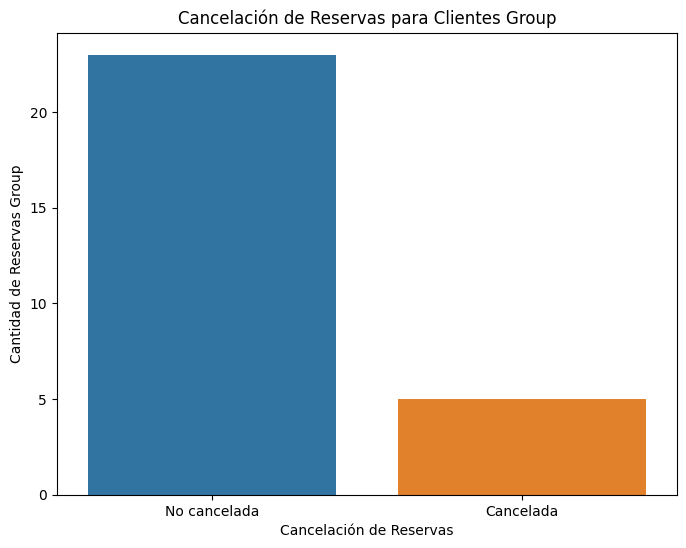

In [56]:
group_df = ds_hoteles_train[ds_hoteles_train['customer_type'] == 'Group']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=group_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas Group')
plt.title('Cancelación de Reservas para Clientes Group')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Juntare los graficos:

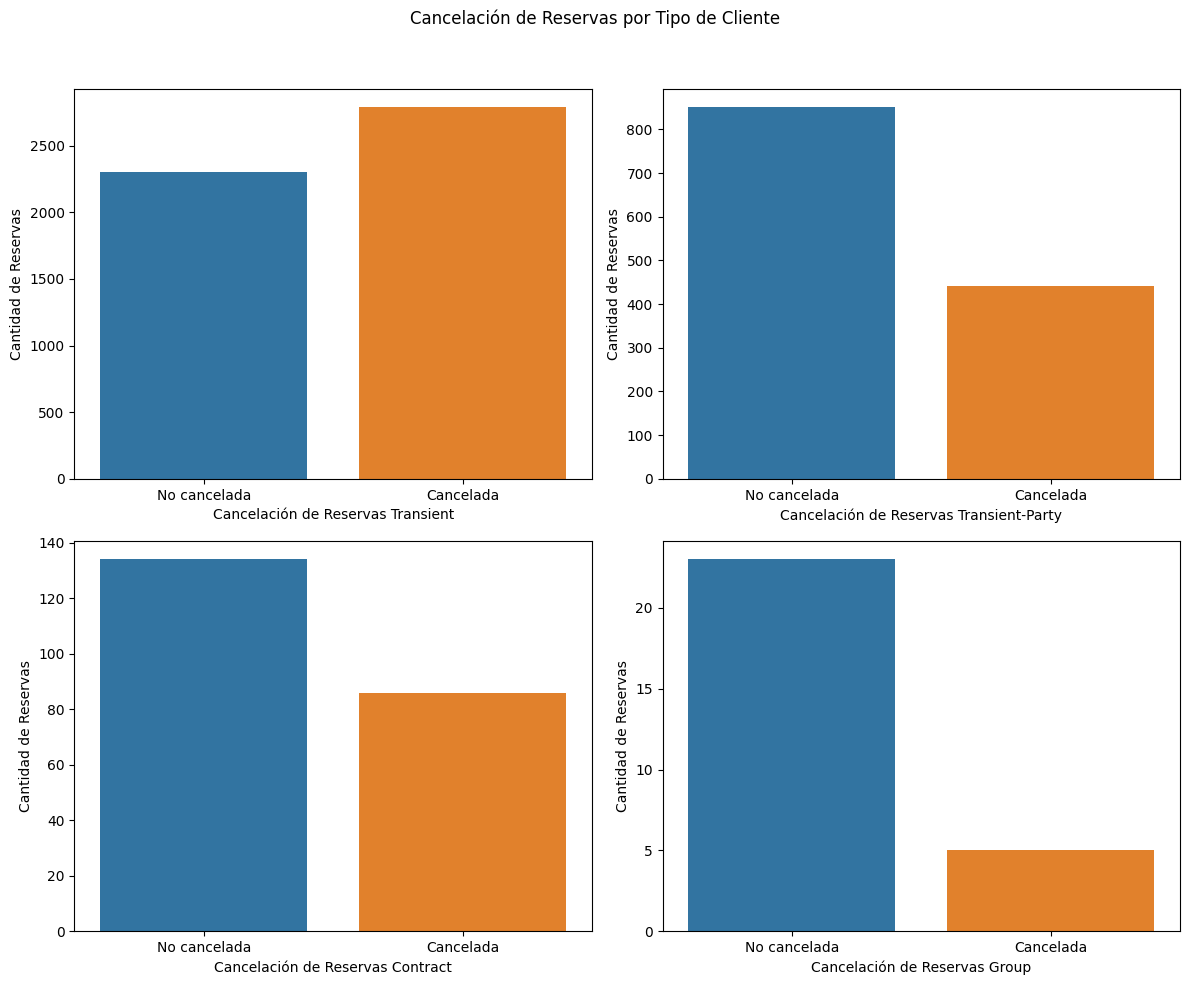

In [57]:

# Crear un conjunto de subgráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Cancelación de Reservas por Tipo de Cliente')

# Crear gráficos de barras para cada tipo de cliente en su respectivo subgráfico
sns.countplot(data=transient_df, x='is_canceled', ax=axes[0, 0])
axes[0, 0].set_xlabel('Cancelación de Reservas Transient')
axes[0, 0].set_ylabel('Cantidad de Reservas')
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['No cancelada', 'Cancelada'])

sns.countplot(data=transient_party_df, x='is_canceled', ax=axes[0, 1])
axes[0, 1].set_xlabel('Cancelación de Reservas Transient-Party')
axes[0, 1].set_ylabel('Cantidad de Reservas')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['No cancelada', 'Cancelada'])

sns.countplot(data=contract_df, x='is_canceled', ax=axes[1, 0])
axes[1, 0].set_xlabel('Cancelación de Reservas Contract')
axes[1, 0].set_ylabel('Cantidad de Reservas')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['No cancelada', 'Cancelada'])

sns.countplot(data=group_df, x='is_canceled', ax=axes[1, 1])
axes[1, 1].set_xlabel('Cancelación de Reservas Group')
axes[1, 1].set_ylabel('Cantidad de Reservas')
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['No cancelada', 'Cancelada'])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Variable Booking Changes


Es una variable que describe el número de cambios/enmiendas realizadas
a la reserva desde el momento en que
la reserva se introdujo en el PMS hasta
el momento del check-in o cancelación

In [58]:
columna_booking_changes = ds_hoteles_train['booking_changes']


columna_booking_changes.value_counts()

0     5778
1      599
2      188
3       37
4       19
5        7
6        2
13       1
7        1
8        1
Name: booking_changes, dtype: int64

Como es de esperarse, esta variable contiene muchos valores posibles, asi que vamos a ver si para esta variable hay datos faltantes en un principio

In [59]:
columna_booking_changes.isna().sum()

0

Esta variable no tiene datos faltantes, por lo que no vamos a tener problemas con la misma

Ahora,dado que es una variable cuantitativa,veremos las medidas de resumen, como la media, mediana, moda, etc..

In [60]:
columna_booking_changes.describe()

count    6633.000000
mean        0.186492
std         0.587145
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        13.000000
Name: booking_changes, dtype: float64

Veo que predominan las reservas que no tuvieron ningun cambio,pero veamos aquellas que si tuvieron


In [61]:
ds_reservas_con_cambios = ds_hoteles_train.loc[columna_booking_changes > 0]

ds_reservas_con_cambios['booking_changes'].describe()

count    855.000000
mean       1.446784
std        0.922861
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       13.000000
Name: booking_changes, dtype: float64

Lo visualizo en un bloxplot

<Axes: xlabel='booking_changes'>

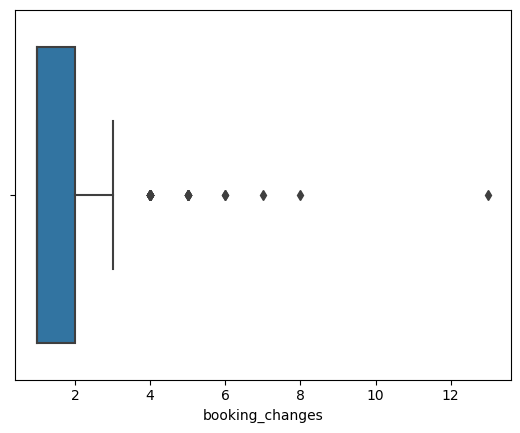

In [62]:
sns.boxplot(x = ds_reservas_con_cambios['booking_changes'])

Veamos la relacion con is_canceled

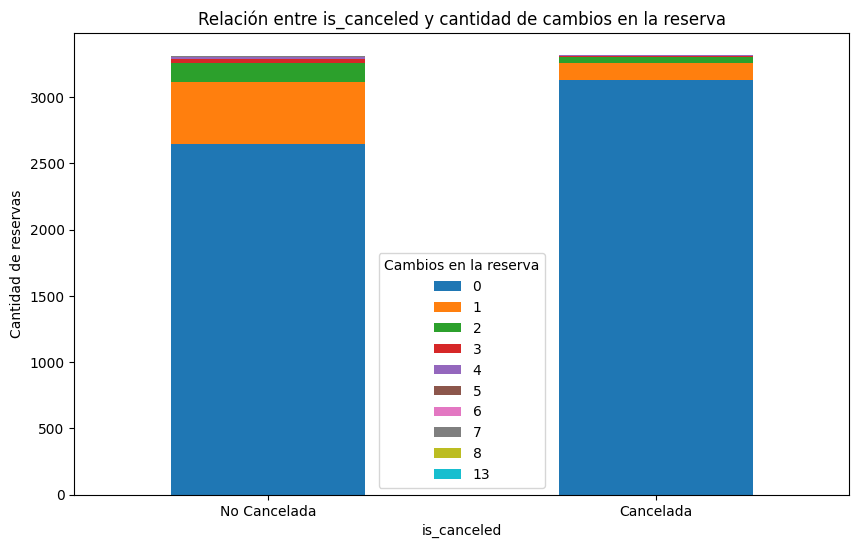

In [63]:

# Agrupar el DataFrame por 'is_canceled' y contar la cantidad de cada valor en 'cambios_reserva'
pivot_df = ds_hoteles_train.groupby(['is_canceled', 'booking_changes']).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('is_canceled')
plt.ylabel('Cantidad de reservas')
plt.xticks([0, 1], ['No Cancelada', 'Cancelada'], rotation=0)
plt.title('Relación entre is_canceled y cantidad de cambios en la reserva')
plt.legend(title='Cambios en la reserva')
plt.show()


# Variable DaysInWaitingList

Es una variable cuantitativa que describe el número de días que la reserva estuvo en el
lista de espera antes de que fuera confirmado
el cliente.Veamos que valores toman :

In [91]:
columna_daysinwaitinglist = ds_hoteles_train['days_in_waiting_list']

columna_daysinwaitinglist.value_counts()

0      6408
31       13
39       12
46       11
58       10
       ... 
75        1
55        1
162       1
21        1
24        1
Name: days_in_waiting_list, Length: 71, dtype: int64

Visualizemos en un grafico

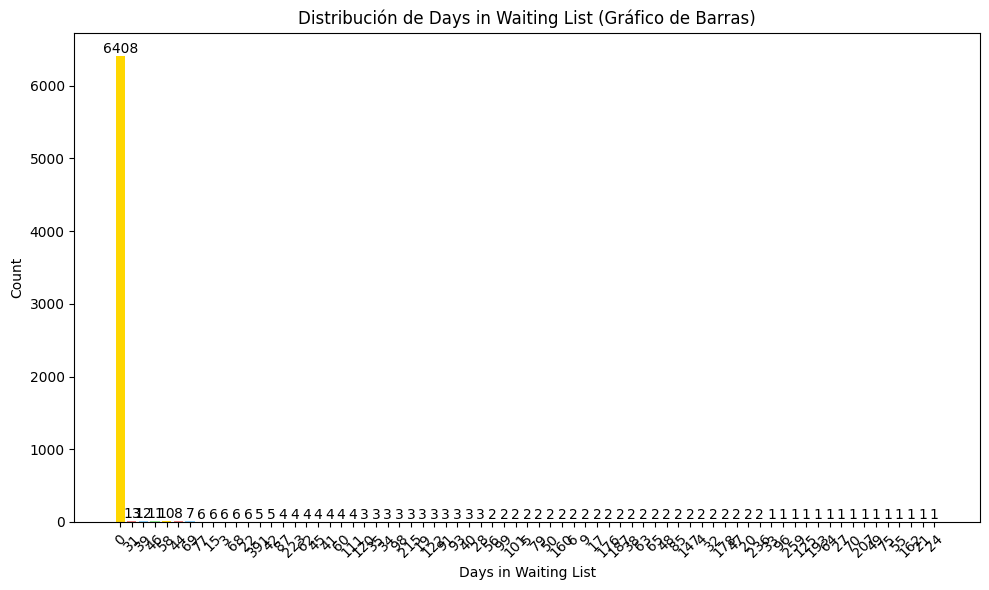

In [65]:
days_in_waiting_list_count = columna_daysinwaitinglist.value_counts()
values = days_in_waiting_list_count.values
labels = days_in_waiting_list_count.index

# Configuración para hacer que el gráfico de barras sea más legible
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']  # Colores
x = range(len(labels))

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(x, values, color=colors)
plt.xticks(x, labels, rotation=45)
plt.xlabel('Days in Waiting List')
plt.ylabel('Count')
plt.title('Distribución de Days in Waiting List (Gráfico de Barras)')

# Agregar etiquetas con los valores en las barras
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Podemos notar la gran presencia de reservas qe no estuvieron en lista de espera,analizare por separado aquellas que al menos estuvieron,1 dia de espera ,para ver el resumen de la misma


In [66]:
ds_days_in_waiting_list = ds_hoteles_train.loc[columna_daysinwaitinglist > 1]

ds_days_in_waiting_list.shape

(225, 31)

Existen 2229 reservas que al menos tuvieron un dia dentro de la lista de espera,veamos sus medias,medianas,etc

In [67]:
ds_days_in_waiting_list['days_in_waiting_list'].describe()

count    225.000000
mean      73.528889
std       71.273933
min        3.000000
25%       34.000000
50%       48.000000
75%       87.000000
max      391.000000
Name: days_in_waiting_list, dtype: float64

<Axes: xlabel='days_in_waiting_list'>

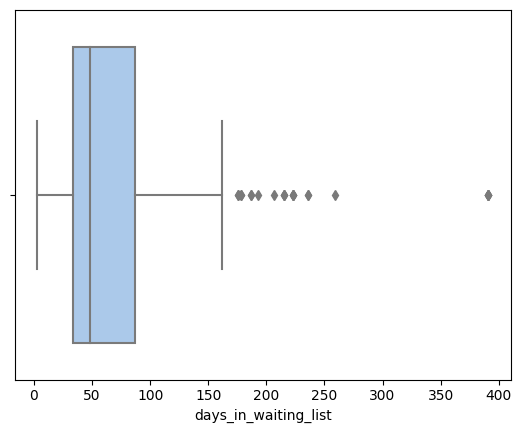

In [68]:
sns.boxplot(x = ds_days_in_waiting_list['days_in_waiting_list'], palette = "pastel")

In [69]:
ds_waiting_list_minor_200 = ds_days_in_waiting_list

Veamos en que proporcion estas reservas cancelan

In [70]:
ds_days_in_waiting_list['is_canceled'].value_counts()

1.0    164
0.0     61
Name: is_canceled, dtype: int64

Veamos en un grafico

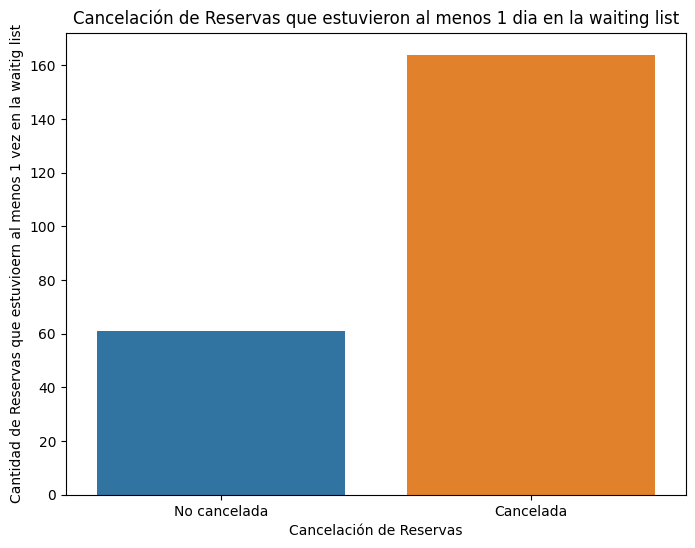

In [71]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_days_in_waiting_list, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas que estuvioern al menos 1 vez en la waitig list')
plt.title('Cancelación de Reservas que estuvieron al menos 1 dia en la waiting list')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Podemos notar como el hecho de estar en lista de espera puede afectar a la canecelacion

Haremos lo msimo con aquellas que no estuvieron en lista de espera

In [72]:
ds_0_days_in_waiting_list = ds_hoteles_train.loc[columna_daysinwaitinglist < 1]

ds_0_days_in_waiting_list.shape

(6408, 31)

Veamos como se distribuyen las cancelaciones


In [73]:
ds_0_days_in_waiting_list['is_canceled'].value_counts()

0.0    3249
1.0    3158
Name: is_canceled, dtype: int64

Veamos en un grafico,que sera muy parecido

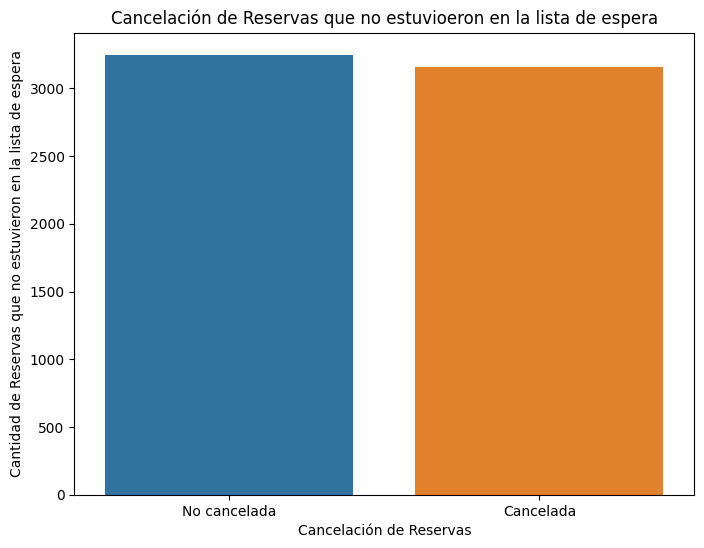

In [74]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_0_days_in_waiting_list, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas que no estuvieron en la lista de espera')
plt.title('Cancelación de Reservas que no estuvioeron en la lista de espera')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

# Variable DepositType

Es una variable cualitativa que nos da una
Indicación sobre si el cliente realizó un
depósito para garantizar la reserva,asi que veamos que errores puede tomar

In [75]:
columna_deposit = ds_hoteles_train['deposit_type']

columna_deposit.value_counts()

No Deposit    5548
Non Refund    1072
Refundable      13
Name: deposit_type, dtype: int64

Veamoslo en un grafico para las distribucion

(-1.0999998464524432,
 1.0999999926882116,
 -1.0999998775017212,
 1.0999999433176095)

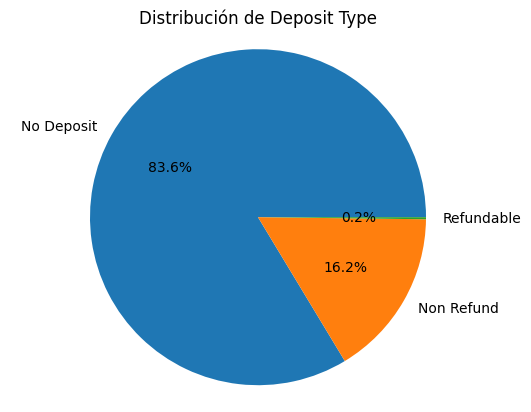

In [76]:
plt.pie(columna_deposit.value_counts(),labels=columna_deposit.value_counts().index,
       autopct='%1.1f%%' )
plt.title('Distribución de Deposit Type')
plt.axis('equal')  # Hace que el gráfico de torta sea circular


Veamos si tiene algun dato faltante para poder seguir con el analisis


In [77]:
columna_deposit.isna().sum()

0

Analizemos variable a variable con respecto a la variable is canceled

In [78]:
ds_deposit_no_deposit = ds_hoteles_train[ds_hoteles_train['deposit_type'] == 'No Deposit']
ds_deposit_non_refund = ds_hoteles_train[ds_hoteles_train['deposit_type'] == 'Non Refund']
ds_deposit_refundable = ds_hoteles_train[ds_hoteles_train['deposit_type'] == 'Refundable']

Veamos en grafico uno por uno

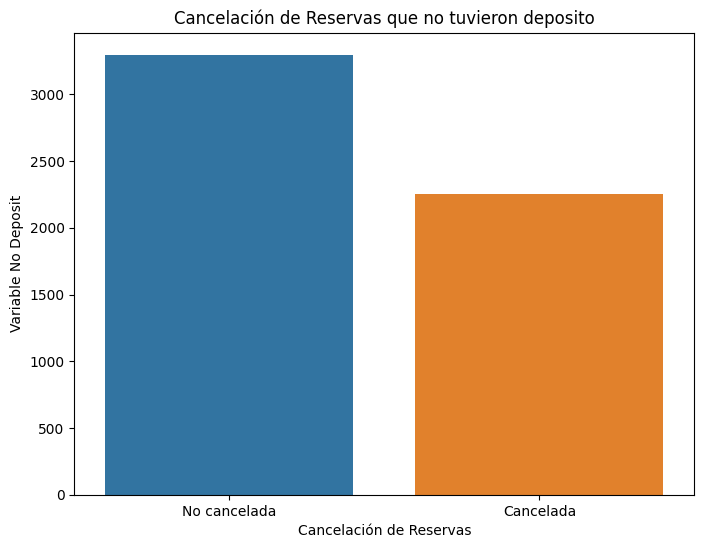

In [79]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_deposit_no_deposit, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Variable No Deposit')
plt.title('Cancelación de Reservas que no tuvieron deposito')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

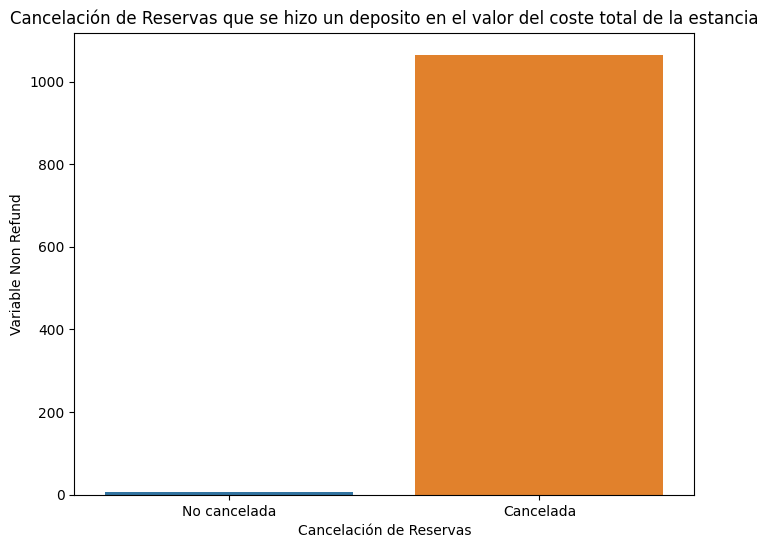

In [80]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_deposit_non_refund, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Variable Non Refund')
plt.title('Cancelación de Reservas que se hizo un deposito en el valor del coste total de la estancia')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Este grafico me llama la atencion,luego veremos mas en fondo

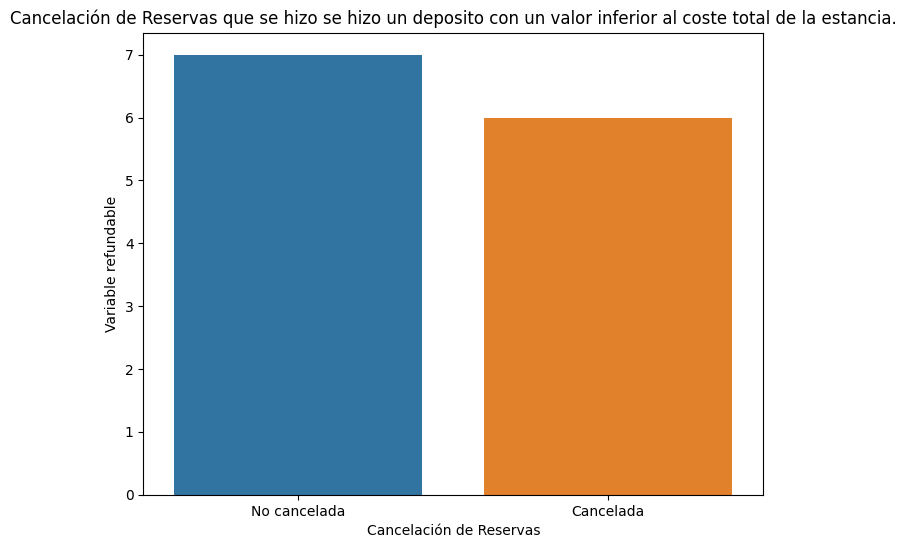

In [81]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_deposit_refundable, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Variable refundable')
plt.title('Cancelación de Reservas que se hizo se hizo un deposito con un valor inferior al coste total de la estancia.')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

# Variable DistributionChannel

Esta variable cualitativa que muestra el canal de distribución de reservas. El término
“TA” significa “Agentes de Viajes” y “TO”
significa “operadores turísticos”.
Veamos como se distribuye

In [82]:
columna_distribution_channel = ds_hoteles_train['distribution_channel']

columna_distribution_channel.value_counts()

TA/TO        5588
Direct        715
Corporate     311
GDS            19
Name: distribution_channel, dtype: int64

Veamos si tiene un valor nulo


In [83]:
columna_distribution_channel.isna().sum()

0

No tiene datos vacios,nos queda en incognita por decifrar sobre los tipos Undefined,pero veamos esto en un grafico de torta

(-1.0999999288955684,
 1.0999999246404382,
 -1.0999998314089954,
 1.099999991971857)

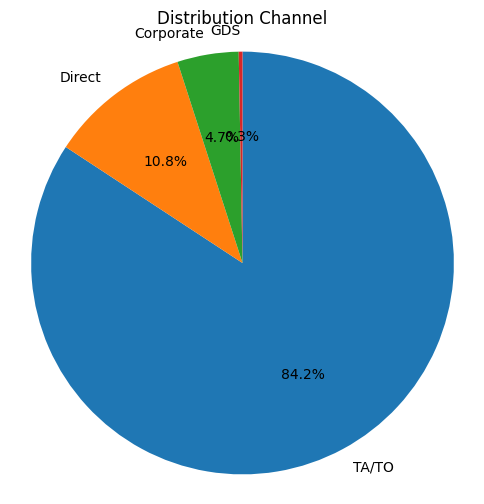

In [84]:

plt.figure(figsize=(6, 6))

plt.pie(columna_distribution_channel.value_counts(),labels=columna_distribution_channel.value_counts().index,
       autopct='%1.1f%%', startangle=90, counterclock=False )
plt.title('Distribution Channel')
plt.axis('equal')  # Hace que el gráfico de torta sea circular

Vamos a considerar la variable TA/TO como la variable a analizar,veamos como se distribuyen con la variable is_canceled

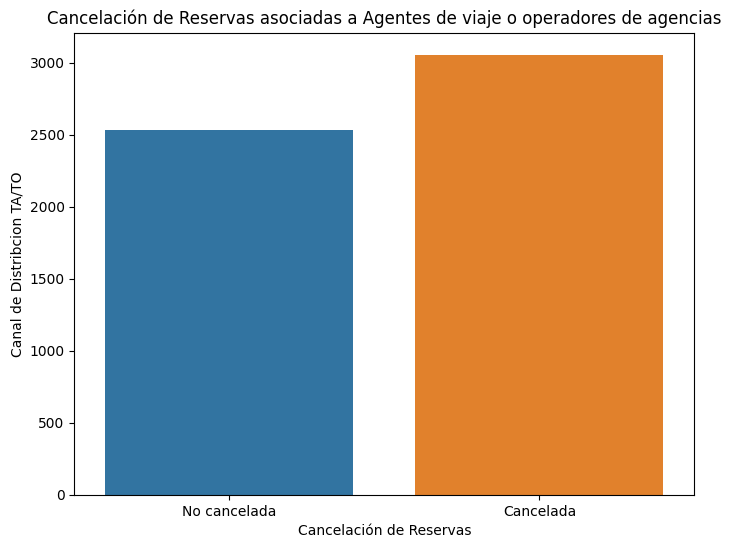

In [85]:
ds_distribution_ta_to = ds_hoteles_train[ds_hoteles_train['distribution_channel'] == 'TA/TO']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_distribution_ta_to, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Canal de Distribcion TA/TO')
plt.title('Cancelación de Reservas asociadas a Agentes de viaje o operadores de agencias')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()


# Nueva sección

# Variable TotalOfSpecialRequests

Esta variable indica el total de solicitudes especiales de la reserva,veamos como se comporta la variable

In [86]:
columna_total_special_request = ds_hoteles_train['total_of_special_requests']

columna_total_special_request.describe()

count    6632.000000
mean        0.531815
std         0.787216
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: total_of_special_requests, dtype: float64

Veamos si tiene algun valor faltane que pueda afectar a nuestro futuro analisis

In [87]:
columna_total_special_request.isna().sum()

1

No tiene valores faltanets por lo cual podemos seguir,veamos como se distribuyen,sabiendo que su promedio es de 0.521068

In [88]:
columna_total_special_request.value_counts()

0.0    4131
1.0    1655
2.0     688
3.0     137
4.0      20
5.0       1
Name: total_of_special_requests, dtype: int64

Dado estos datos , vamos a ver como se distribuyen con la variable is_canceled

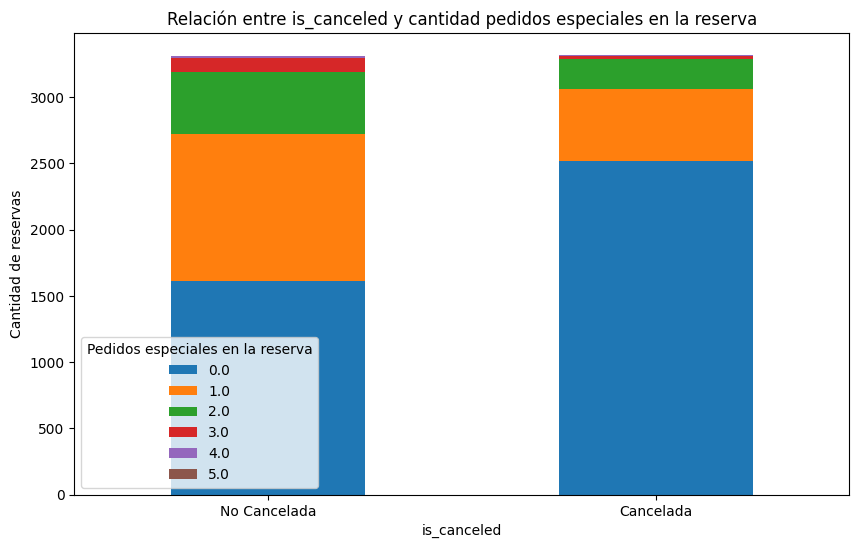

In [89]:

pivot_special_request = ds_hoteles_train.groupby(['is_canceled', 'total_of_special_requests']).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas
ax = pivot_special_request.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('is_canceled')
plt.ylabel('Cantidad de reservas')
plt.xticks([0, 1], ['No Cancelada', 'Cancelada'], rotation=0)
plt.title('Relación entre is_canceled y cantidad pedidos especiales en la reserva')
plt.legend(title='Pedidos especiales en la reserva')
plt.show()



---

# Variable Market Segment
En un primer analisis, parece ser una variable del tipo categorica. Hace refencia al segmento del mercado al cual esta destinada la reserva. Las siglas TA y TO, hacen referencia Travel Agents y Travel Operators. Por lo que podemos empezamos a explorar cuales son sus posibles valores y como se pueden llegar a relacionar con las reservas canceladas

In [90]:
market_segmets_counts = ds_hoteles_train["market_segment"].value_counts().reset_index()

# Variable Meal

En un primer analisis, es una variable del tipo categorica. Hace refencia al tipo de comida reservada. Por lo que podemos empezamos a explorar cuales son sus posibles valores y como se pueden llegar a relacionar con las reservas canceladas.
Mi hipotesis antes de comenzar con el analisis,es que el tipo de comida no tiene impacto en la tasa de cancelacion,pero veremos en el analisis si es correcta.






In [92]:
columna_meal = ds_hoteles_train['meal']

columna_meal.value_counts()

BB           5130
HB            752
SC            628
Undefined      66
FB             57
Name: meal, dtype: int64

Luego de ver los posibles valores que toman,debo asociar la variable Undefined y SC ,ya que el paper dado lo dice ,por lo cual quedaria asi

In [102]:
df_copia_meal = ds_hoteles_train.copy()

# Reemplazar "SC" y "Undefined" por "SC_Undefined" en la columna "meal" de la copia
df_copia_meal['meal'] = df_copia_meal['meal'].replace(['SC', 'Undefined'], 'SC_Undefined')

# Verificar el resultado en la copia
columna_meal_copia = df_copia_meal['meal']
columna_meal_copia.value_counts()



BB              5130
HB               752
SC_Undefined     694
FB                57
Name: meal, dtype: int64

Veamos como se distribuyen en un grafico

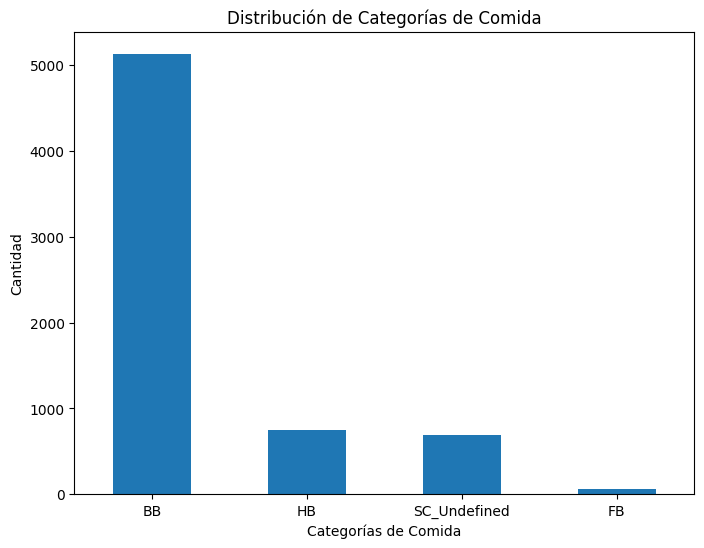

In [103]:
conteo_meal = df_copia_meal['meal'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
conteo_meal.plot(kind='bar')
plt.xlabel('Categorías de Comida')
plt.ylabel('Cantidad')
plt.title('Distribución de Categorías de Comida')
plt.xticks(rotation=0)  # Para evitar la rotación de etiquetas en el eje x
plt.show()

Vamos a analizar variable por variable,y analizar si existe alguna hipotesis asociada a ella

In [104]:
ds_meal_bb = df_copia_meal[df_copia_meal['meal'] == 'BB']
ds_meal_hb = df_copia_meal[df_copia_meal['meal'] == 'HB']
ds_meal_sc_undefined = df_copia_meal[df_copia_meal['meal'] == 'SC_Undefined']
ds_meal_fb = df_copia_meal[df_copia_meal['meal'] == 'FB']

Comenzemos con la variable BB

In [105]:
ds_meal_bb['is_canceled'].value_counts()

0.0    2567
1.0    2562
Name: is_canceled, dtype: int64

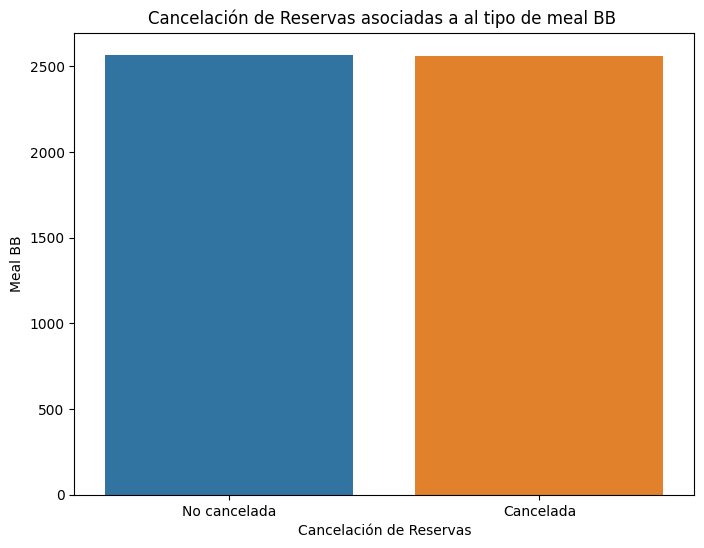

In [106]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_meal_bb, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Meal BB')
plt.title('Cancelación de Reservas asociadas a al tipo de meal BB ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

A simple vista , con el tipo 'BB' podemos decir que no pareciera tener impacto en las tasas de cancelacion,ya que se dan con numeros similares entre las canceladas y las no canceladas

In [107]:
ds_meal_hb['is_canceled'].value_counts()

0.0    390
1.0    362
Name: is_canceled, dtype: int64

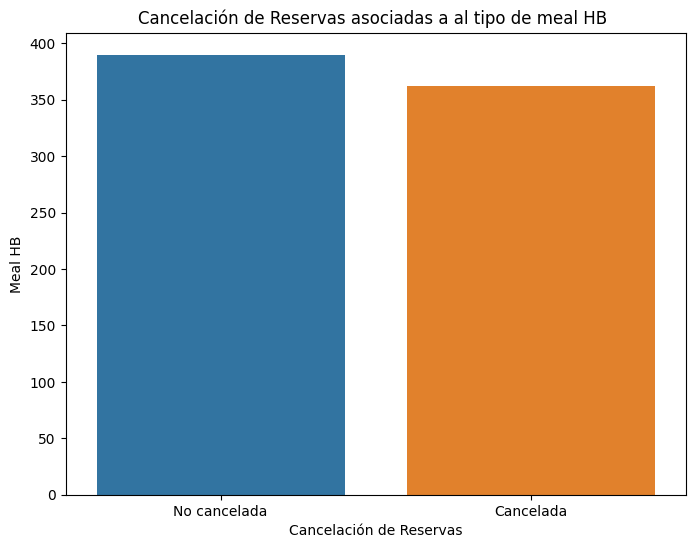

In [108]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_meal_hb, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Meal HB')
plt.title('Cancelación de Reservas asociadas a al tipo de meal HB ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Al igual que la variable BB,esta variable tampoco tiene gran impacto en las cancelaciones

In [109]:
ds_meal_sc_undefined['is_canceled'].value_counts()

1.0    355
0.0    339
Name: is_canceled, dtype: int64

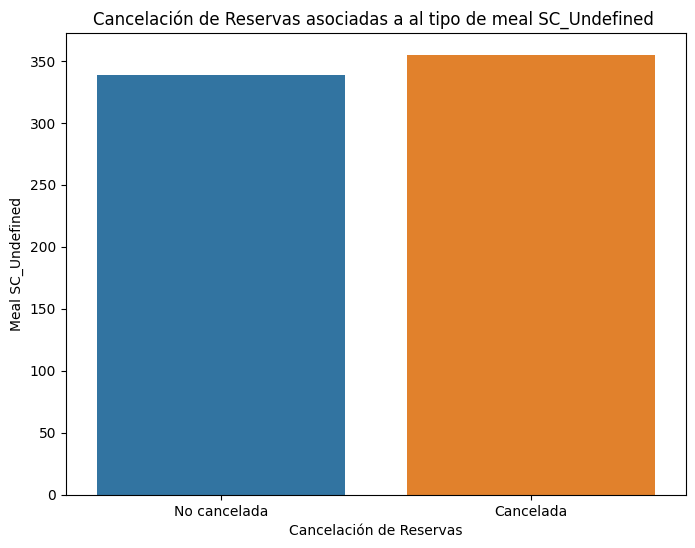

In [110]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_meal_sc_undefined, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Meal SC_Undefined')
plt.title('Cancelación de Reservas asociadas a al tipo de meal SC_Undefined ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

A diferencia de las otras variables ,las cancelaciones son mayores que en las no canceladas,pero por muy pocos casos,veamos la ultima

In [111]:
ds_meal_fb['is_canceled'].value_counts()

1.0    43
0.0    14
Name: is_canceled, dtype: int64

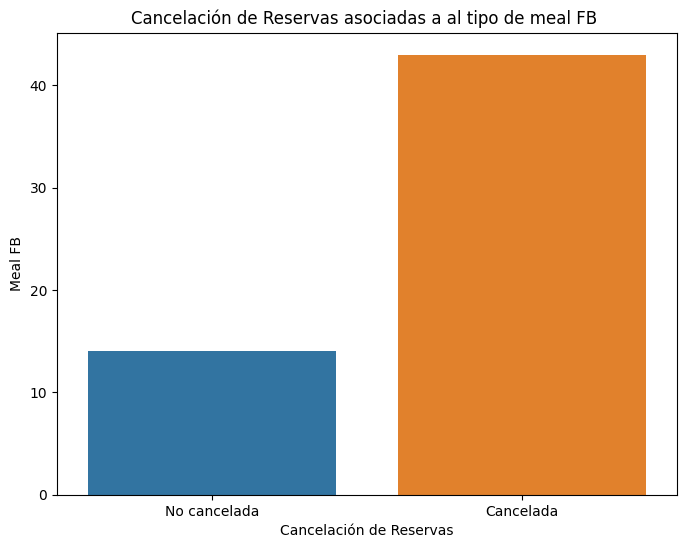

In [112]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_meal_fb, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Meal FB')
plt.title('Cancelación de Reservas asociadas a al tipo de meal FB ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Podemos notar que las reservas con Meal FB tienden a tener una mayor proporcion de cancelacion que las que usan otro tipo de comida,por lo cual mi hipotesis no es correctalos datos nos arrojan una tendencia mayor que en los ootros tipo de cancelacion.
Podemos analizar sus tasas promedio de cancelacion

In [113]:
promedio_por_meal = df_copia_meal.groupby('meal')['is_canceled'].mean()
promedio_por_meal

meal
BB              0.499513
FB              0.754386
HB              0.481383
SC_Undefined    0.511527
Name: is_canceled, dtype: float64

Dado estos resultados y que mi hipotesis anterior quedo refutada,planteo una nueva que las tasas de cancelacion de la variable FB pueden estar asociadas al tipo de hotel donde se ha hecho la reserva,y veremos si esta relacionada con sus cancelaciones

In [114]:
df_hotel_ch = ds_hoteles_train[ds_hoteles_train['hotel'] == 'City Hotel']
df_hotel_rh = ds_hoteles_train[ds_hoteles_train['hotel'] == 'Resort Hotel']

Veamos sus tasas de cancelacion

In [124]:

tasa_cancelacion_hotel_ch = df_hotel_ch.groupby('meal')['is_canceled'].mean()

tasa_cancelacion_hotel_rh = df_hotel_rh.groupby('meal')['is_canceled'].mean()

tasa_cancelacion_fb_ch = tasa_cancelacion_hotel_ch['FB']
tasa_cancelacion_fb_rh = tasa_cancelacion_hotel_rh['FB']



print('La tasa de cancelacin de el City Hotel,relacionada con el tipo de comida FbB, es: ' + str(tasa_cancelacion_fb_ch )+' y la de Resort Hotel: ' +str( tasa_cancelacion_fb_rh))

La tasa de cancelacin de el City Hotel,relacionada con el tipo de comida FbB, es: 0.6666666666666666 y la de Resort Hotel: 0.7592592592592593


Por lo cual ,estos valores indican que la categoría "FB" tiene tasas de cancelación relativamente altas tanto en el City Hotel como en el Resort Hotel. La tasa de cancelación en el Resort Hotel es un poco más alta que en el City Hotel para esta categoría específica.

La tasa de cancelación en la categoría "FB" es alta en ambos tipos de hoteles, lo que sugiere que esta categoría podría ser más propensa a cancelaciones independientemente del tipo de hotel.Veremos mas adelante si tiene algun significado estos datos obtenidos

# Variable RequiredCardParkingSpaces

En un primer analisis, es una variable del tipo caunitativa . Hace refencia al número de plazas de aparcamiento necesarias por el cliente.
Veamos como se distribuyen los valores


In [125]:
columna_parking_spaces = ds_hoteles_train['required_car_parking_spaces']
columna_parking_spaces.value_counts()

0.0    6329
1.0     301
2.0       2
Name: required_car_parking_spaces, dtype: int64

Creare una copia de mi dataset donde dira se dividira si nesecita o no lugar para parking,dado las pocas alternativas que existen asi puedo asociar tambien a un unico valor dado su poco volumen

In [131]:
df_copia_parking = ds_hoteles_train.copy()

# Reemplazar 0 con 'No Requiere' y 1 o 2 con 'Requiere'
df_copia_parking['required_car_parking_spaces'] = df_copia_meal['required_car_parking_spaces'].replace({0: 'No Requiere', 1: 'Requiere', 2: 'Requiere'})


columna_parking_spaces_nueva = df_copia_parking['required_car_parking_spaces']

columna_parking_spaces_nueva.value_counts()

No Requiere    6329
Requiere        303
Name: required_car_parking_spaces, dtype: int64

Veamos como se comporta con las cancelaciones,sobre todo las que requieren nos importan para ver su comportamiento

In [132]:
ds_parking_requiere = df_copia_parking[df_copia_parking['required_car_parking_spaces'] == 'Requiere']
ds_parking_no_requiere = df_copia_parking[df_copia_parking['required_car_parking_spaces'] == 'No Requiere']

Comenecemos con los que no requiere

In [133]:
ds_parking_no_requiere['is_canceled'].value_counts()

1.0    3322
0.0    3007
Name: is_canceled, dtype: int64

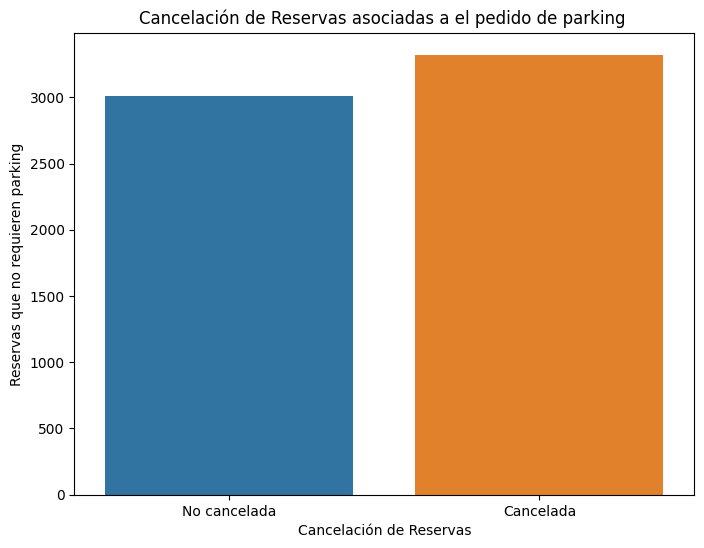

In [134]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_parking_no_requiere, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Reservas que no requieren parking')
plt.title('Cancelación de Reservas asociadas a el pedido de parking ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Existe una mayor cantidad de reservas canceladas ,a simple vista podems notar que no es una gran diferencia,veamos las que si requerian que puede ser una variable mas significativa para el analisis

In [135]:
ds_parking_requiere['is_canceled'].value_counts()

0.0    303
Name: is_canceled, dtype: int64

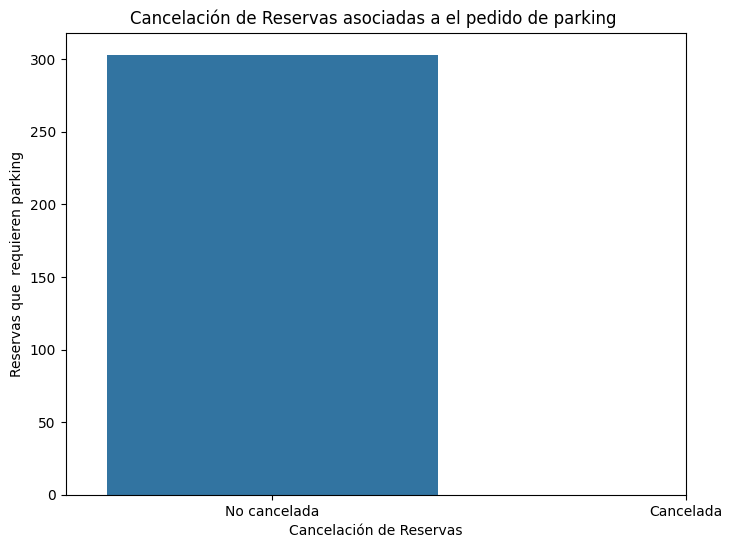

In [136]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_parking_requiere, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Reservas que  requieren parking')
plt.title('Cancelación de Reservas asociadas a el pedido de parking ')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Con respecto a las reservas con requerimiento de parking,notamos que ni una de ellas tuvo cancelacion,por lo cual hace que esta variable tenga mucho mas peso en nuestro analisis.
La tasa de cancelación para las reservas que requieren estacionamiento es igual a cero